In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.simplefilter('ignore')

In [3]:
#Load train and test datasets
train = pd.read_csv("D:\\Titanic_train.csv")
test = pd.read_csv("D:\\Titanic_test.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# Dataset shape
print("Dataset Shape:", train.shape)
print("Dataset Shape:", test.shape)

Dataset Shape: (891, 12)
Dataset Shape: (418, 11)


In [11]:
# Display data types and null info
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [13]:
#Describe Test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
#Describe Train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# 2. Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


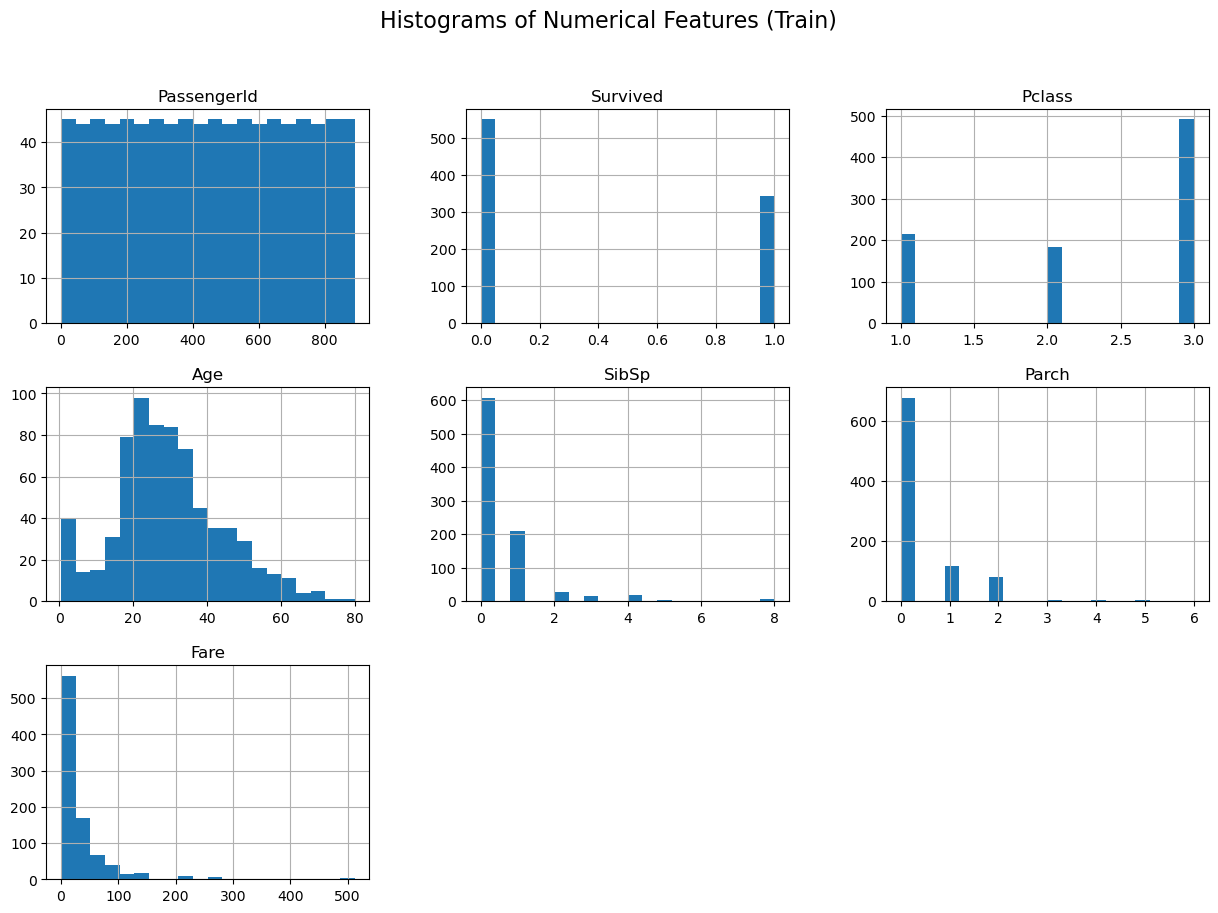

In [23]:
# Data Distribution - Train
train.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features (Train)", fontsize=16)
plt.show()

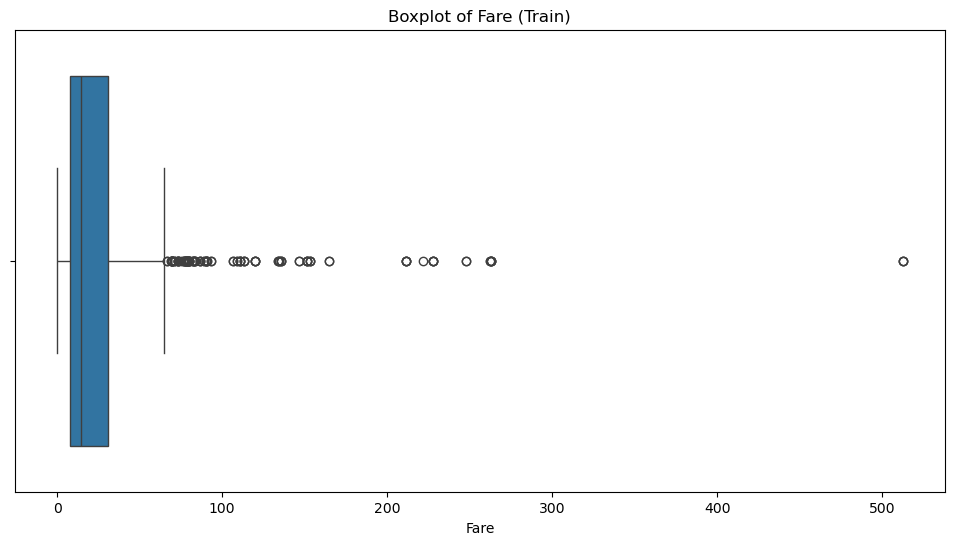

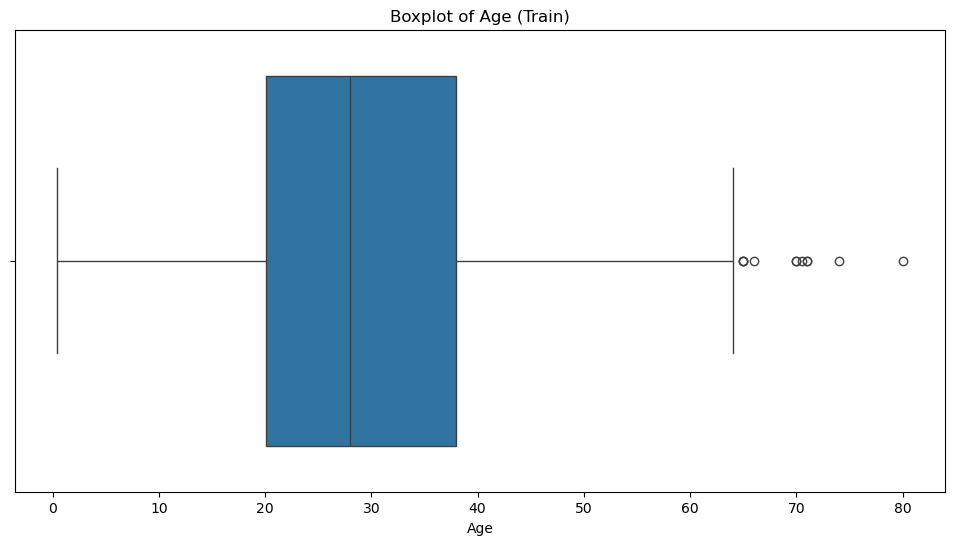

In [25]:
# Boxplots (Train)
plt.figure(figsize=(12,6))
sns.boxplot(x=train['Fare'])
plt.title("Boxplot of Fare (Train)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=train['Age'])
plt.title("Boxplot of Age (Train)")
plt.show()

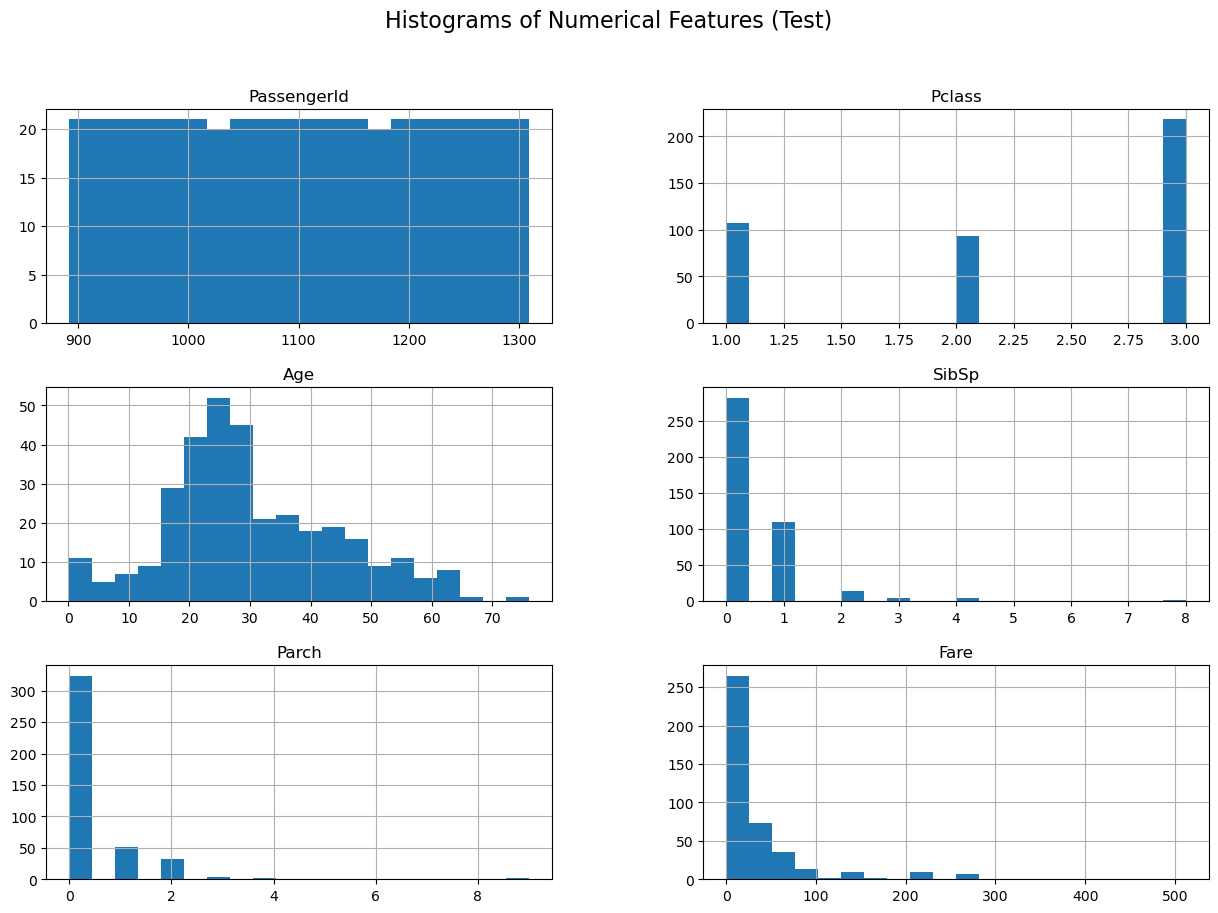

In [27]:
# Data Distribution - Test
#Histogram
test.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features (Test)", fontsize=16)
plt.show()

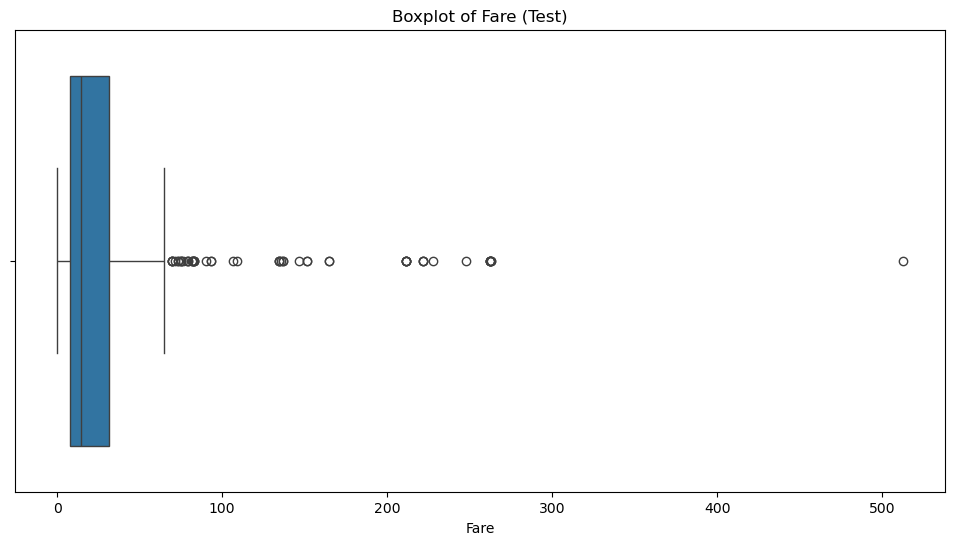

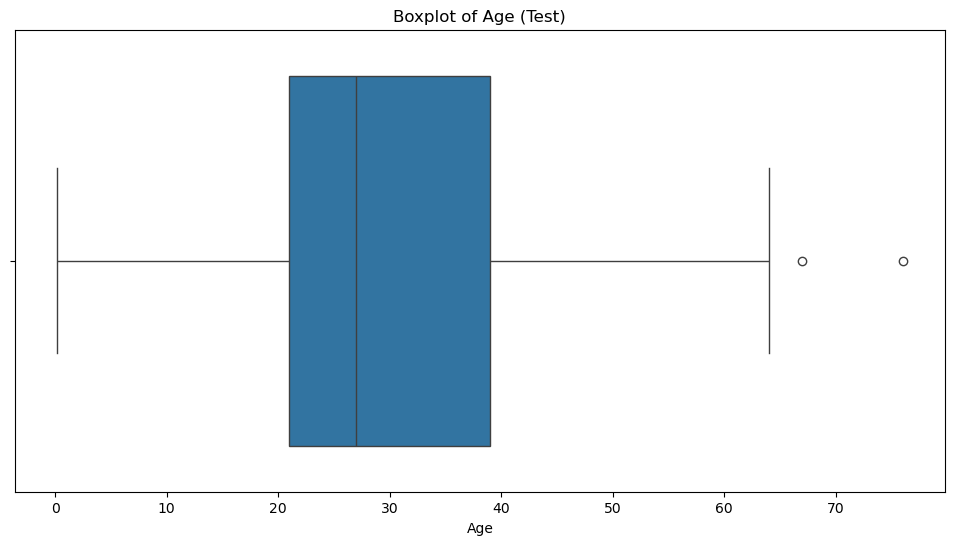

In [29]:
# Boxplots (Test)
plt.figure(figsize=(12,6))
sns.boxplot(x=test['Fare'])
plt.title("Boxplot of Fare (Test)")
plt.show()

if "Age" in test.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=test['Age'])
    plt.title("Boxplot of Age (Test)")
    plt.show()

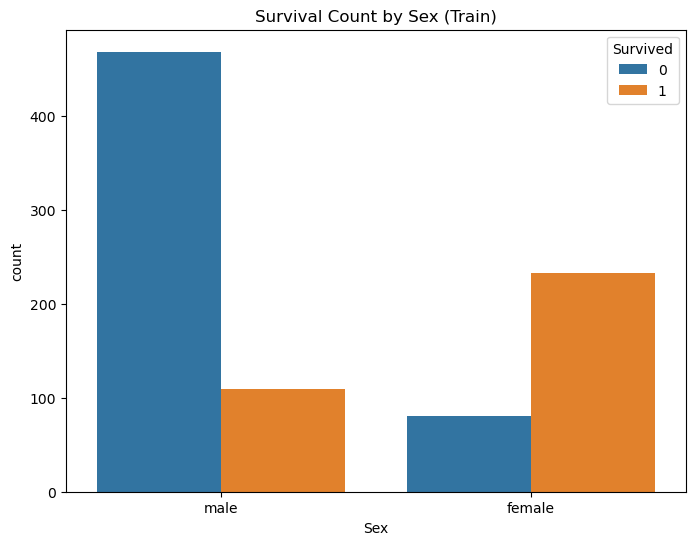

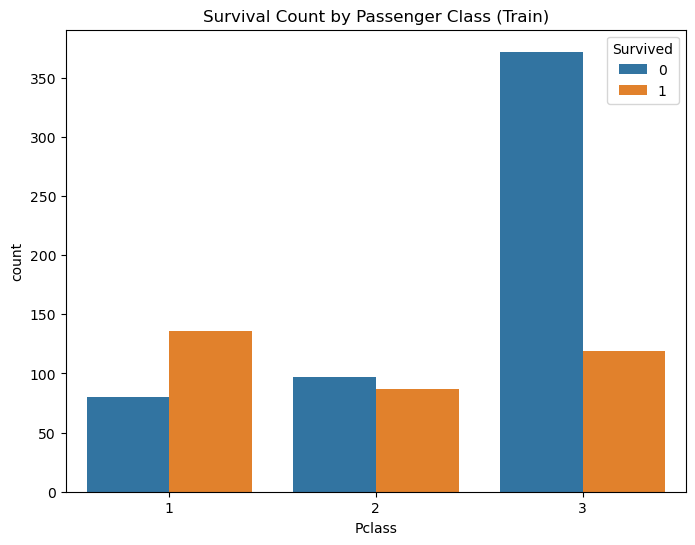

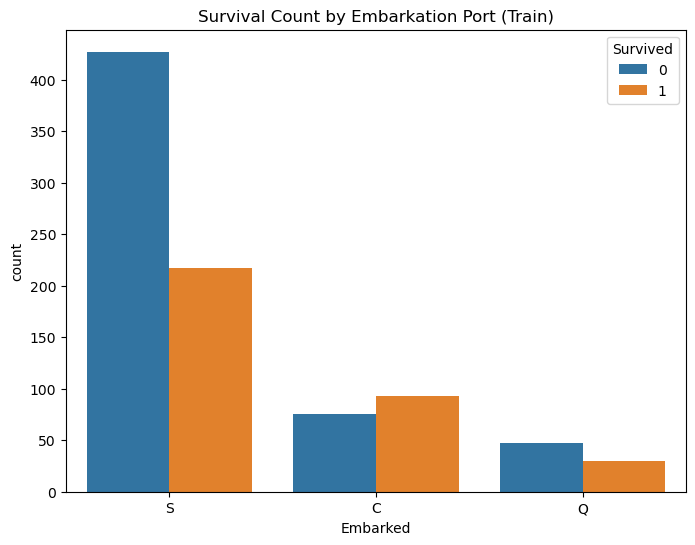

In [31]:
# Relationships with Survival (only in Train, since Test lacks labels)
plt.figure(figsize=(8,6))
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Count by Sex (Train)")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival Count by Passenger Class (Train)")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.title("Survival Count by Embarkation Port (Train)")
plt.show()

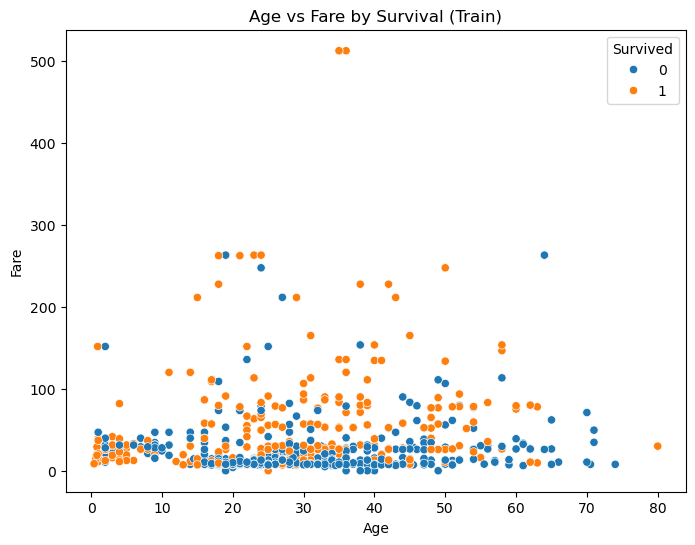

In [33]:
# Scatter plots
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train)
plt.title("Age vs Fare by Survival (Train)")
plt.show()

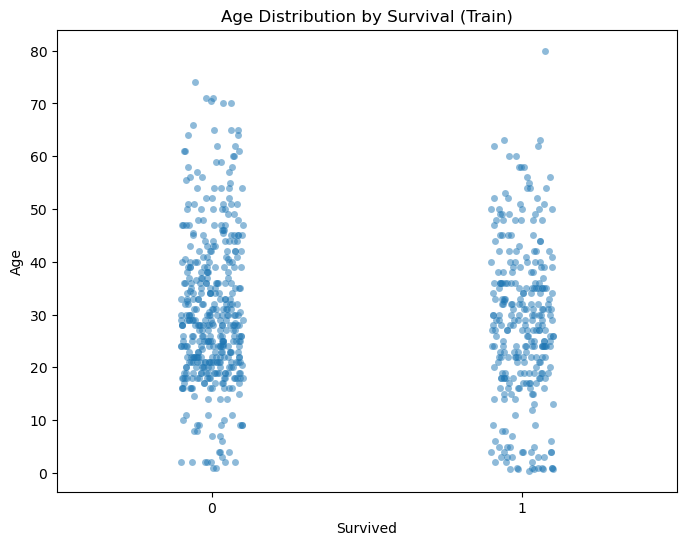

In [35]:
# Strip plot: Age distribution by Survival
plt.figure(figsize=(8,6))
sns.stripplot(x="Survived", y="Age", data=train, jitter=True, alpha=0.5)
plt.title("Age Distribution by Survival (Train)")
plt.show()

In [49]:
#Impute missing values

# Fill missing Age with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Fill missing Fare in test set with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Fill missing Embarked with mode (most common value)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# For Cabin: create binary feature "HasCabin"
train['HasCabin'] = train['Cabin'].notnull().astype(int)
test['HasCabin'] = test['Cabin'].notnull().astype(int)
     

# Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)/.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)/.', expand=False)

rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

In [51]:
# Feature Engineering - family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

In [53]:
#Encode categorical variables

# Encode Sex (Male=0, Female=1) Categorical features
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

# Encode Embarked (C=0, Q=1, S=2)
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

In [59]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

train['Title'] = le.fit_transform(train['Title'])
test['Title'] = le.transform(test['Title'])

In [61]:
# Select features
features = ['Pclass','Sex','Age','Fare','SibSp','Parch',
            'Embarked','HasCabin','FamilySize','IsAlone','Title']

X = train[features]
y = train['Survived']
X_test_final = test[features]

print("Preprocessed Train Shape:", X.shape)
print("Preprocessed Test Shape:", X_test_final.shape)
print("Features used:", features)

Preprocessed Train Shape: (891, 11)
Preprocessed Test Shape: (418, 11)
Features used: ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'HasCabin', 'FamilySize', 'IsAlone', 'Title']


In [65]:
#Predictive Modeling

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [70]:
# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [72]:
# 3. LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=50)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)

evaluate_model(y_val, lgb_preds, "LightGBM")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [76]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

evaluate_model(y_val, xgb_preds, "XGBoost")


XGBoost Performance:
Accuracy : 0.7877094972067039
Precision: 0.7313432835820896
Recall   : 0.7101449275362319
F1-Score : 0.7205882352941176

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [80]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"  {name} Evaluation \n  ")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model("LightGBM", y_val, lgb_preds)
evaluate_model("XGBoost", y_val, xgb_preds)

  LightGBM Evaluation 
  
Accuracy: 0.7653631284916201
Precision: 0.7014925373134329
Recall: 0.6811594202898551
F1 Score: 0.6911764705882353

Confusion Matrix:
 [[90 20]
 [22 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.70      0.68      0.69        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

  XGBoost Evaluation 
  
Accuracy: 0.7877094972067039
Precision: 0.7313432835820896
Recall: 0.7101449275362319
F1 Score: 0.7205882352941176

Confusion Matrix:
 [[92 18]
 [20 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77   

In [82]:
#Cross-validation & Hyperparameter Tuning

# LightGBM Hyperparameter Tuning
lgb_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                        param_grid=lgb_params,
                        cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X_train, y_train)
print("\nBest LightGBM Params:", lgb_grid.best_params_)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [83]:
# XGBoost Hyperparameter Tuning (example)
xgb_params = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                        param_grid=xgb_params,
                        cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [86]:
# Predict with best estimator
lgb_preds = lgb_grid.best_estimator_.predict(X_val)
evaluate_model("LightGBM (Tuned)", y_val, lgb_preds)

  LightGBM (Tuned) Evaluation 
  
Accuracy: 0.776536312849162
Precision: 0.7377049180327869
Recall: 0.6521739130434783
F1 Score: 0.6923076923076923

Confusion Matrix:
 [[94 16]
 [24 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [88]:
# 10. Hyperparameter Tuning Example
lgb_params = {
    'num_leaves': [31, 50],
    'min_child_samples': [10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 500]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                        param_grid=lgb_params,
                        cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X_train, y_train)
print("\nBest LightGBM Params:", lgb_grid.best_params_)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [89]:
xgb_params = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid=xgb_params,
                        cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [90]:
# Evaluate tuned models
best_lgb = lgb_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

evaluate_model("LightGBM (Tuned)", y_val, best_lgb.predict(X_val))
evaluate_model("XGBoost (Tuned)", y_val, best_xgb.predict(X_val))

  LightGBM (Tuned) Evaluation 
  
Accuracy: 0.776536312849162
Precision: 0.7101449275362319
Recall: 0.7101449275362319
F1 Score: 0.7101449275362319

Confusion Matrix:
 [[90 20]
 [20 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

  XGBoost (Tuned) Evaluation 
  
Accuracy: 0.776536312849162
Precision: 0.7543859649122807
Recall: 0.6231884057971014
F1 Score: 0.6825396825396826

Confusion Matrix:
 [[96 14]
 [26 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.75      0.62      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.7

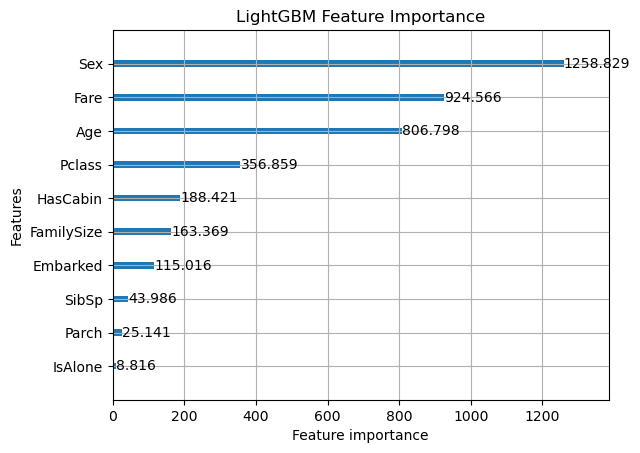

In [103]:
#Visualize Feature Importance:

# LightGBM Feature Importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title("LightGBM Feature Importance")
plt.show()

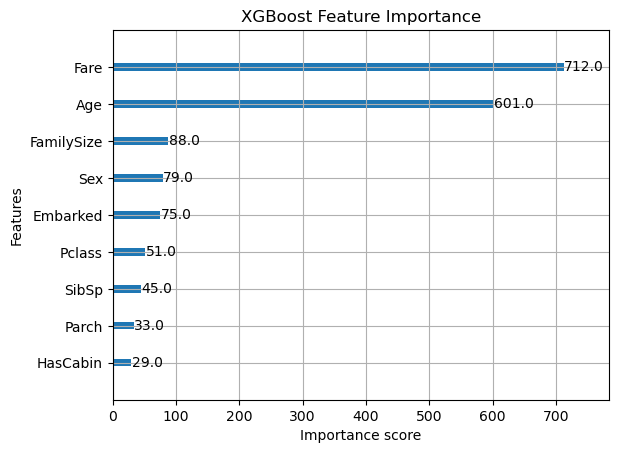

In [105]:
# XGBoost Feature Importance
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()